# Spectrogram Analysis

## Notebook Objectives
1. To plot and display a spectrogram
2. To create a function to detect peaks and create a bounding box around them.
3. To detect silences present in the spectrogram

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import librosa
import scipy
import matplotlib.pyplot as plt
import librosa.display
import matplotlib.image as mpimg
from skimage import io
import matplotlib.patches as patches

### Load the audio files

In [2]:
sig,fs = librosa.load("sounds/XC408823_7.wav")

### Calculate the spectrogram

In [3]:
S = librosa.feature.melspectrogram(y=sig, sr=fs)

### Display plot of the spectrogram

/home/madlad/miniconda3/envs/acoustic_python3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/madlad/miniconda3/envs/acoustic_python3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/madlad/miniconda3/envs/acoustic_python3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


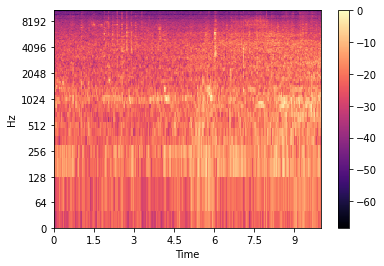

In [4]:
ax = plt.subplot(111)
fig = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),x_axis="time",y_axis="log",ax=ax)
plt.colorbar(fig,ax=ax)
plt.savefig("spec.png",bbox_inches='tight',pad_inches=0)


In [5]:
def plot_segment(t,f,pdb,patch_arr):
    fig,ax = plt.subplots()
    pl = ax.pcolormesh(t,f,pdb,shading="gouraud")
    for [min_x,max_x,min_y,max_y] in patch_arr:
        ax.add_patch(patches.Rectangle(
            (min_x,min_y),
            max_x-min_x,
            max_y-min_y,
            edgecolor="white",
            facecolor="None"
            )
        )
    plt.colorbar(pl,ax=ax)

In [6]:
def find_splits(xs,time_thresh=0.5):
    prev_x = xs[0]
    split_indices = []
    for ii,x in enumerate(xs[1:]):
        if x-prev_x>=time_thresh:
            split_indices.append(ii)
            print("DIFF: ",x-prev_x," Coords: ",(x,prev_x))
        prev_x = x
    return split_indices

In [7]:
def segment_spec(filepath,thresh):
    sig,fs = librosa.load(filepath)
    f,t,sxx =scipy.signal.spectrogram(sig,fs)
    pdb = librosa.power_to_db(sxx,ref=np.max)
    np_indices = np.where(pdb>=thresh)
    
    f_indices = np_indices[0]
    t_indices = np_indices[1]
    
    req_f = [f[index] for index in f_indices]
    req_t = [t[index] for index in t_indices]
    req_f.sort()
    req_t.sort()
    
    
    
    min_x = req_t[0]
    max_x = req_t[-1]
    min_y = req_f[0]
    max_y = req_f[-1]
    patch_arr = [[min_x,max_x,min_y,max_y]]

      
    plot_segment(t,f,pdb,patch_arr)
    
    

/home/madlad/miniconda3/envs/acoustic_python3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


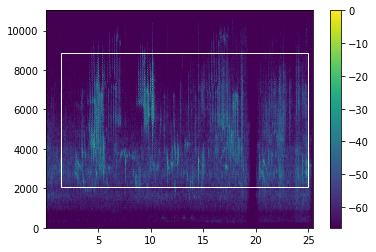

In [8]:
segment_spec("sounds/XC134874.mp3",-30)

In [11]:
filepath = "sounds/XC134874.mp3"
sig,fs = librosa.load(filepath)
f,t,sxx =scipy.signal.spectrogram(sig,fs)
pdb = librosa.power_to_db(sxx,ref=np.max)


/home/madlad/miniconda3/envs/acoustic_python3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


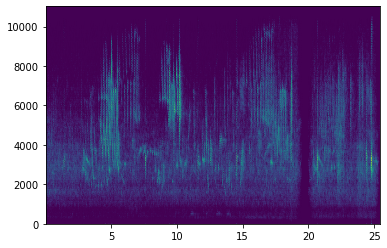

In [12]:
img = plt.pcolormesh(t,f,pdb,shading="gouraud")


In [26]:
def silence_detector(pdb,thresh):

    mask = pdb>thresh
    beg = 0

    silence_limits = []
    for i in range(mask.shape[1]):
        if sum(mask[:,i])==0:
            if beg==0:
                start = i
                end = i
                beg=1
            else:
                end = i

        else:
            if (start,end) not in silence_limits:
                silence_limits.append((start,end))
            beg = 0
    
    time_silence = [(t[tup[0]],t[tup[1]]) for tup in silence_limits]
    return time_silence

[(0.005804988662131519, 0.01596371882086168),
 (19.541043083900227, 20.028662131519276)]